In this assignment you will build models to predict quality of wines.  Please review the data dictionary and data provenance here:

https://archive.ics.uci.edu/ml/datasets/wine+quality



1. Load the data
2. Explore the distribution of the target variable, recode the target variable as  1 (quality > 6) and 0 (quality < 7).
3. Perform exploratory data analysis
4. Explore the information value and distribution of features using the pairplot

5 pts.


In [120]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [121]:
wine = pd.read_csv('/content/whitewine-classification.csv')

In [122]:
wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  goodwine  
0      8.8         0  
1      9.5         0  
2     10.1         0  
3      9.9         0  
4      9.9         0

<Axes: >

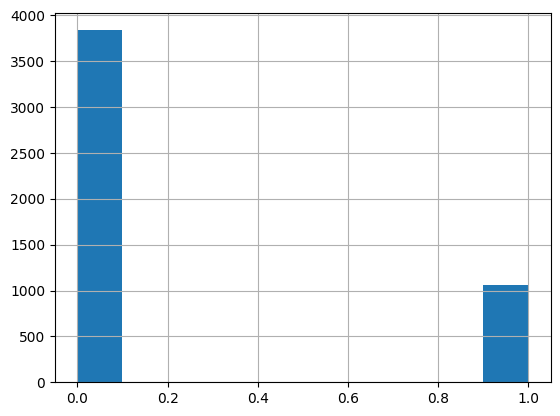

In [123]:
wine.goodwine.hist()

In [124]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


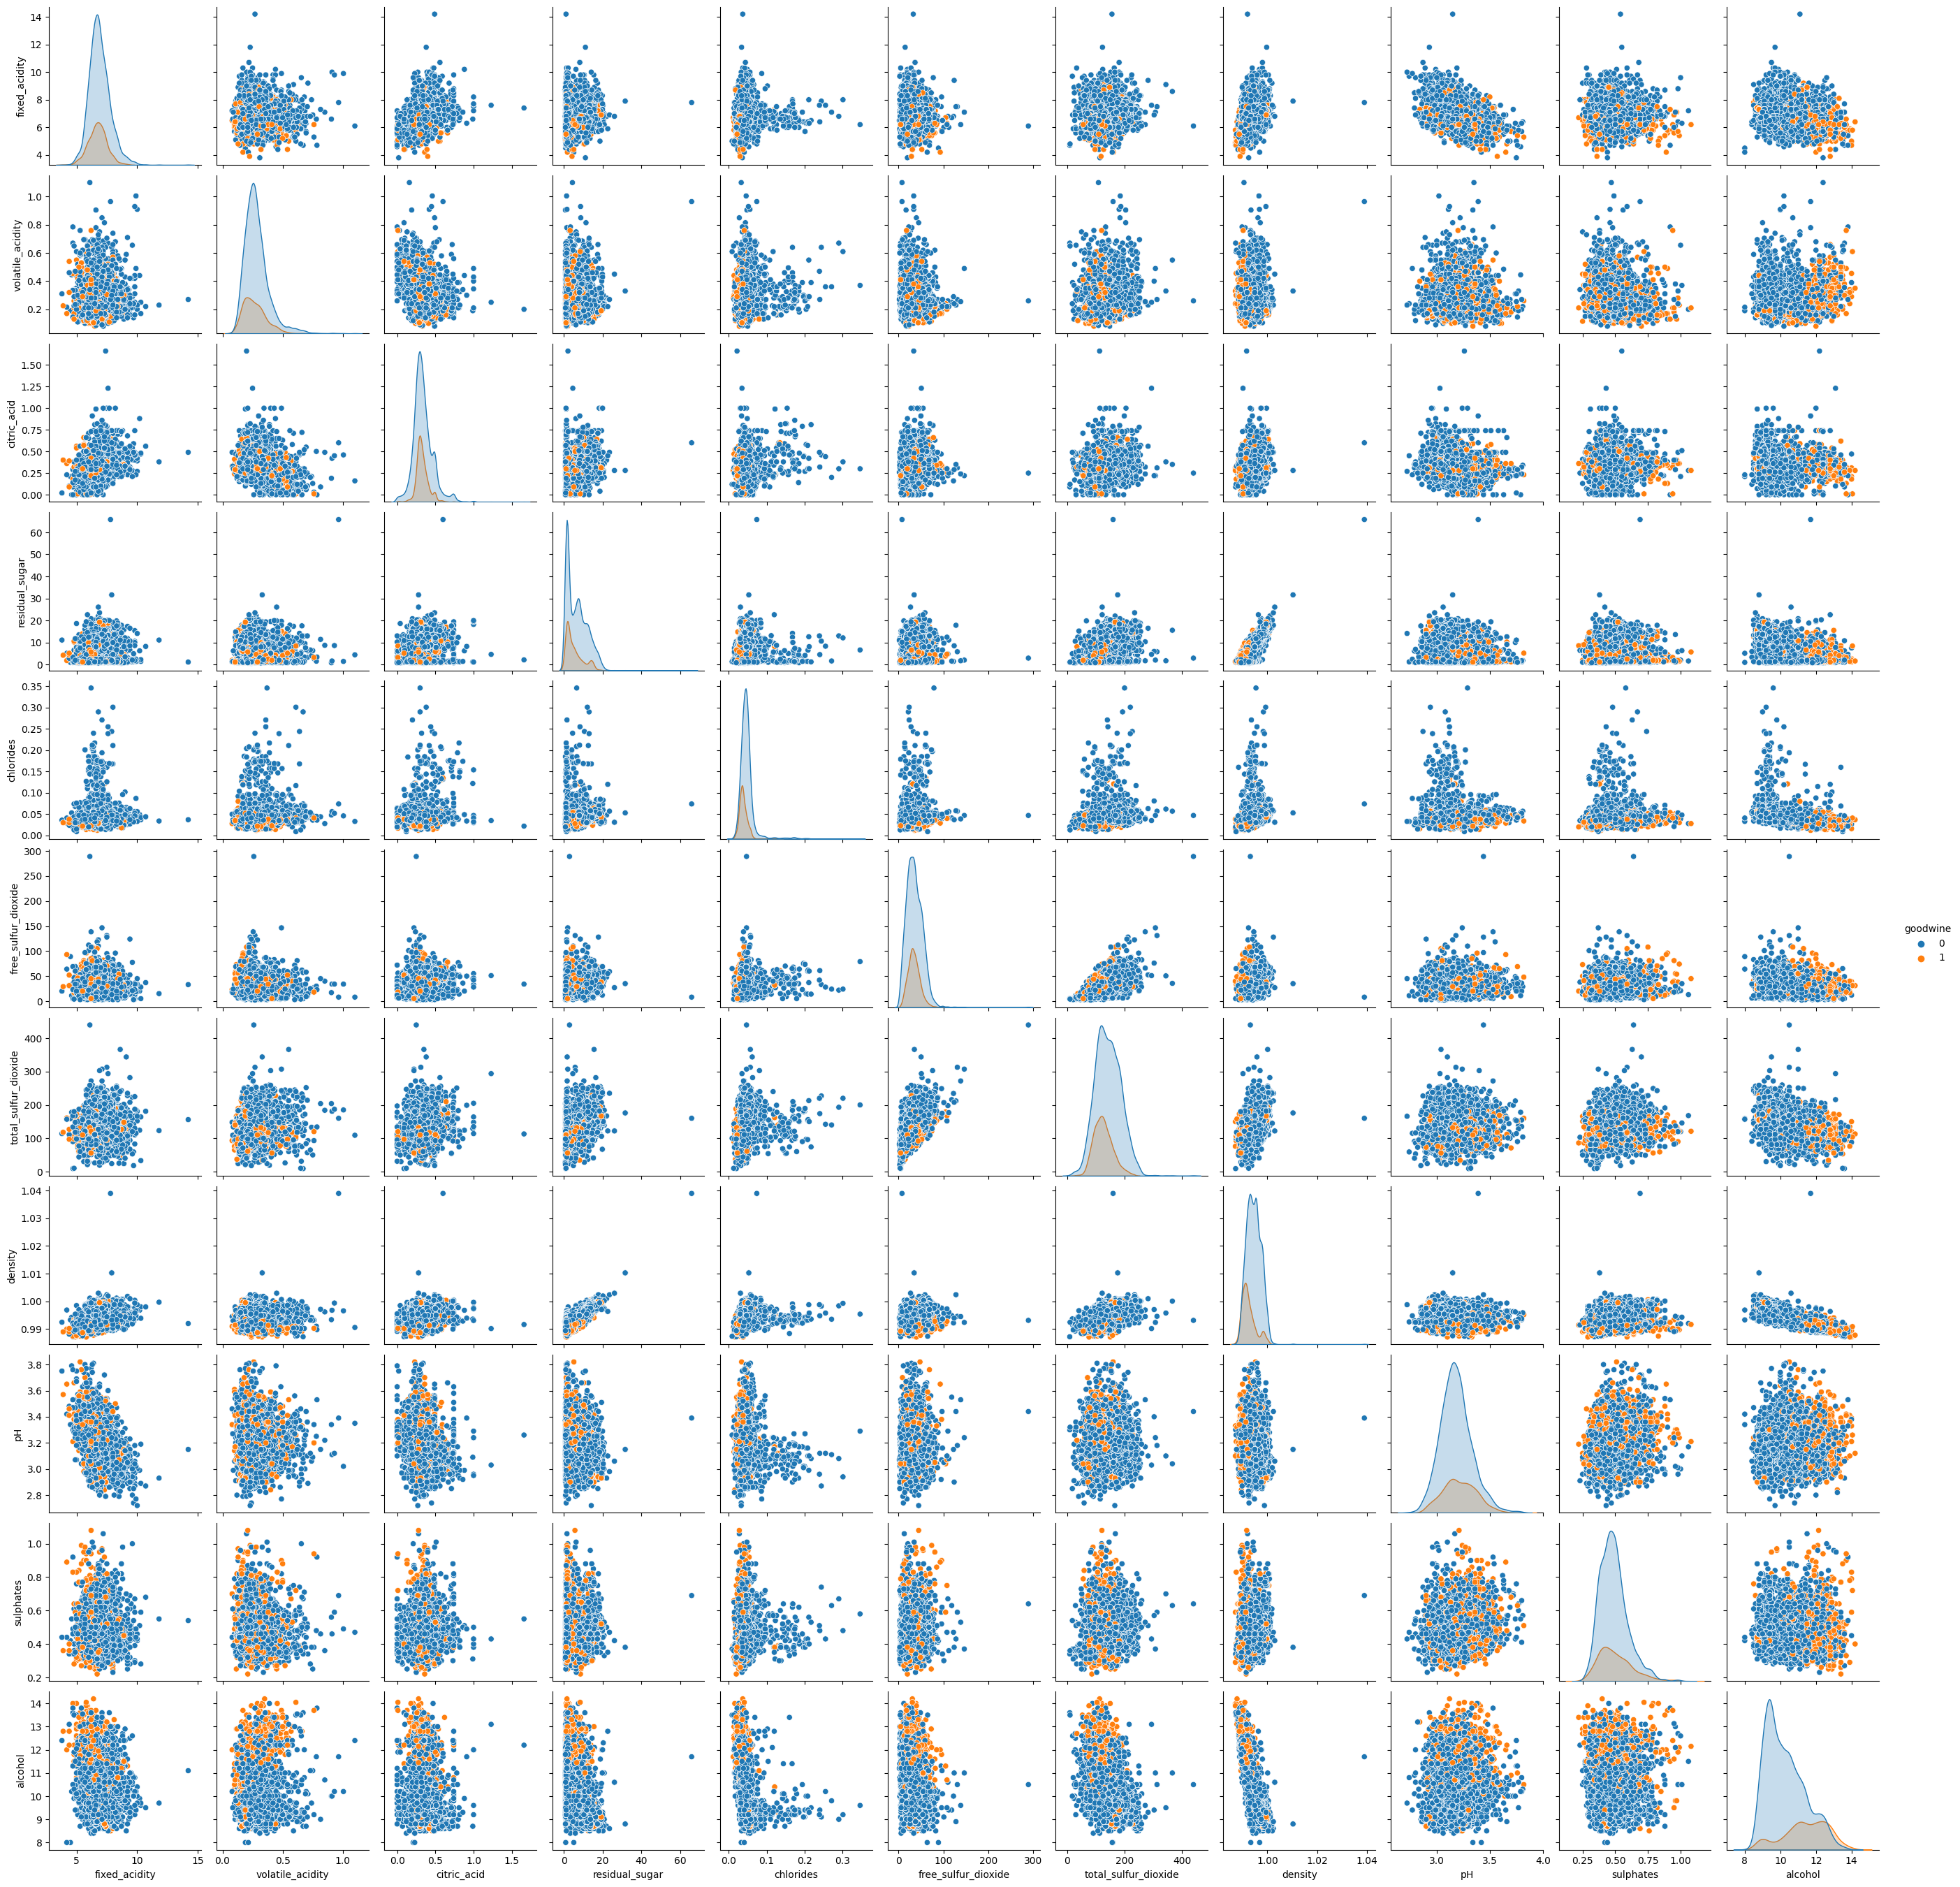

In [125]:
sns.pairplot(wine, hue = 'goodwine')

In [126]:
wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     goodwine  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     0.216415  
std       0.151001     0.114126     1.230621     0.411842  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.470000    10.400000     0.000000  
75%       3.280000     0.550000    11.400000     0.000000  
max       3.820000     1.080000    14.200000     1.000000

5. Develop logistic regression, kNN (optimize k), and decision tree models to predict wine quality. Make sure to preprocess the data as needed by the respective models.

6. Assess the performance of each model using the following metrics: Recall, Precision, F1, ROC AUC.  Which is the best model based on ROC AUC?

15 pts.

In [167]:
X = wine.drop('goodwine', axis=1)
y = wine['goodwine']

Gini Model:

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [169]:
gini_model = tree.DecisionTreeClassifier(criterion= 'gini', min_samples_leaf=5, max_depth=3)

gini_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [170]:
y_pred_gini = gini_model.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred_gini)

array([[1015,  121],
       [ 192,  142]])

In [172]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1136
           1       0.54      0.43      0.48       334

    accuracy                           0.79      1470
   macro avg       0.69      0.66      0.67      1470
weighted avg       0.77      0.79      0.78      1470



In [173]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

gini_model_roc_auc = roc_auc_score(y_test, gini_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gini_model.predict_proba(X_test)[:,1])

print(gini_model_roc_auc)

0.7866160285063676


Entropy Model:

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [144]:
entropy_model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, max_depth=3)

entropy_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [145]:
y_pred_entropy = entropy_model.predict(X_test)

In [146]:
confusion_matrix(y_test,y_pred_entropy)

array([[1015,  121],
       [ 192,  142]])

In [153]:
print(classification_report(y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1136
           1       0.54      0.43      0.48       334

    accuracy                           0.79      1470
   macro avg       0.69      0.66      0.67      1470
weighted avg       0.77      0.79      0.78      1470



In [154]:
entropy_model_roc_auc = roc_auc_score(y_test, entropy_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, entropy_model.predict_proba(X_test)[:,1])

print(entropy_model_roc_auc)

0.7914760268196002


KNN Model:

In [155]:
from sklearn.preprocessing import MinMaxScaler

wine_scaled = wine.copy()

scaler = MinMaxScaler()

wine_columns = wine.columns.drop('goodwine')

wine_scaled[wine_columns] = scaler.fit_transform(wine[wine_columns])

In [156]:
wine_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  goodwine  
0  0.129032         0  
1  0.241935         0  
2  0.338710         0  
3  0.306452         0  
4  0.306452         0

In [157]:
Xx = wine_scaled.drop('goodwine', axis=1)
yy = wine_scaled['goodwine']

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.3, random_state=1)

In [158]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,Xx_train,yy_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())


In [159]:
print('Optimal k: ', cv_scores.index(max(cv_scores))+1)

Optimal k:  40


In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')
knn.fit(Xx_train, yy_train)

yy_pred = knn.predict(Xx_test)

print(confusion_matrix(yy_test,yy_pred))
print(classification_report(yy_test,yy_pred))

[[1072   64]
 [ 218  116]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1136
           1       0.64      0.35      0.45       334

    accuracy                           0.81      1470
   macro avg       0.74      0.65      0.67      1470
weighted avg       0.79      0.81      0.79      1470



In [161]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(yy_test,knn.predict_proba(Xx_test)[:,1]))

ROC AUC:  0.8210129037699249


Logistic Regression Model

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [163]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [164]:
y_pred = logmodel.predict(X_test)

In [165]:
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1087   49]
 [ 255   79]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1136
           1       0.62      0.24      0.34       334

    accuracy                           0.79      1470
   macro avg       0.71      0.60      0.61      1470
weighted avg       0.77      0.79      0.76      1470



In [166]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

print(logit_roc_auc)

0.7812552711478452


After creating Decision Tree models, a KNN model and a logistic regression models, it seems as though the KNN model has the best ROC AUC score by a decent margin. I think this is likely due to finding the optimal K of 40 making it able to assess the data much better.

Another notable statistic is the extremely high recall of case 0 for the logistic regression model meaning that it is best equipped to properly predict true negatives. In this case, if you wanted to ensure that you filtered out all cases of low quality wine, the logistic regression model would be extremely effective.